# Problem Set 5

See [Introduction](https://datascience.quantecon.org/../pandas/intro.html) and [Basic Functionality](https://datascience.quantecon.org/../pandas/basics.html)

- Authors: Jossie Jiang (48372874) and Cathy Liu (94353109)
- Contributions: Jossie ang Cathy worked on this problem set individually and compared their answers after they have done all questions. The method of getting the answers are different though those answers are the same. In this problem set, there wasn't anything different when comapring the answers.

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

## Setup

These questions use data on daily Covid cases in health regions in Canada from the [COVID-19 Canada Open Data Working Group](https://github.com/ccodwg/Covid19Canada).

In [2]:
url = "https://github.com/ccodwg/Covid19Canada/raw/master/timeseries_hr/cases_timeseries_hr.csv"
try : # only download if cases_raw has not already been defined 
    cases_raw
except:
    cases_raw = pd.read_csv(url, parse_dates=["date_report"])

try :
    hr_map 
except: 
    hr_map = pd.read_csv("https://github.com/ccodwg/Covid19Canada/raw/master/other/hr_map.csv")

/Users/jiang/opt/anaconda3/lib/python3.9/site-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '25-01-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/Users/jiang/opt/anaconda3/lib/python3.9/site-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '26-01-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/Users/jiang/opt/anaconda3/lib/python3.9/site-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '27-01-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/Users/jiang/opt/anaconda3/lib/python3.9/site-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '28-01-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return

Now, we create cases per 100,000 and then do the same manipulation as in the pandas basics lecture. We will focus on BC health regions in this problem set.

In [3]:
cases_raw

,province,health_region,date_report,cases,cumulative_cases
0,Alberta,Calgary,2020-01-25,0,0
1,Alberta,Calgary,2020-01-26,0,0
2,Alberta,Calgary,2020-01-27,0,0
3,Alberta,Calgary,2020-01-28,0,0
4,Alberta,Calgary,2020-01-29,0,0
...,...,...,...,...,...
84655,Yukon,Yukon,2022-04-29,9,4196
84656,Yukon,Yukon,2022-04-30,0,4196
84657,Yukon,Yukon,2022-01-05,0,4196
84658,Yukon,Yukon,2022-02-05,21,4217


In [4]:
cases_bc = cases_raw.loc[(cases_raw['province'] == 'BC') &  
                         (cases_raw['date_report'] < pd.to_datetime('2022-01-01')) &
                         (cases_raw['date_report'] >= pd.to_datetime('2021-01-01')),:] # Take the data for BC in year 2021 only
# create cases per 100,000
cases_bc = cases_bc.merge(hr_map[['province','health_region','pop']],
                          on=['province','health_region'],
                          how='left')
cases_bc['cases100k'] = cases_bc['cases'] / cases_bc['pop'] * 100_000
cases_bc = ( 
    cases_bc.reset_index()
    .pivot_table(index='date_report',columns='health_region', values='cases100k')
)    
cases_bc

health_region,Fraser,Interior,Island,Northern,Vancouver Coastal
date_report,,,,,
2021-01-01,0.000000,0.000000,0.000000,0.000000,0.000000
2021-01-02,25.701861,24.589675,9.101332,33.213897,24.191511
2021-01-03,45.464436,9.935222,10.519722,39.252788,26.815675
2021-01-04,21.129137,7.203036,6.500952,17.110190,21.813363
2021-01-05,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
2021-12-27,42.153154,36.387752,24.585417,17.781177,28.865804
2021-12-28,41.995474,33.282995,33.686749,13.755250,32.966060
2021-12-29,83.623027,46.447164,36.523528,33.213897,46.824926


The resulting `cases_bc` DataFrame contains Covid cases per 100,000 population for each BC health region and day, in 2021.

## Question 1

Transform the `cases` and `cases100k` columns by taking their absolute value. At each date, what is the minimum number of cases per 100,000 across health regions?

In [5]:
cases_bc = cases_bc.abs()
cases_bc.agg(min, axis=1)

date_report
2021-01-01     0.000000
2021-01-02     9.101332
2021-01-03     9.935222
2021-01-04     6.500952
2021-01-05     0.000000
                ...    
2021-12-27    17.781177
2021-12-28    13.755250
2021-12-29    33.213897
2021-12-30    40.930258
2021-12-31    39.740889
Length: 365, dtype: float64

What was the (daily) median number of cases per 100,000 in each health region?

In [6]:
import statistics as stat
cases_bc.agg(stat.median)

health_region
Fraser               8.567287
Interior             6.582085
Island               2.482181
Northern             8.051854
Vancouver Coastal    5.576348
dtype: float64

What was the maximum number of cases per 100,000 across health regions? In what health region did it happen? On what date was this achieved?

- Hint 1: What Python type (not `dtype`) is returned by a reduction?  
- Hint 2: Read documentation for the method `idxmax`.  

In [7]:
cases_bc.agg(max)
max_cs_num = max(cases_bc.agg(max))
max_cs_region = cases_bc.agg(max).idxmax()
max_cs_date = cases_bc[cases_bc[max_cs_region]== max_cs_num].index
print(max_cs_num, max_cs_region, max_cs_date)

136.2105291410014 Northern DatetimeIndex(['2021-10-18'], dtype='datetime64[ns]', name='date_report', freq=None)


Classify each health region as high or low volatility based on whether the variance of their cases per 100,000 is above or below 100.

In [8]:
def high_or_low(s):
    """
    This function takes a pandas Series object and returns high
    if the variance is above 100 and low if the mean is below 100
    """
    if s.var() < 100:
        out = "Low"
    else:
        out = "High"

    return out

cases_bc.agg(high_or_low)

health_region
Fraser               High
Interior             High
Island                Low
Northern             High
Vancouver Coastal    High
dtype: object

## Question 2

Imagine that we want to determine whether cases per 100,000 was High (> 10),
Low (0 < x <= 10), or None (x = 0) for each health region and each day.

Write a Python function that takes a single number as an input and
outputs a single string which notes whether that number is High, Low, or None.

In [9]:
def high_or_low(x):
    """
    This function takes a pandas Series object and returns high
    if the number of cases is above 10;
     low if the number of cases is between 0 and 10 (include);
     None if the number of cases is 0.
    """
    if x == 0:
        out = "None"
    elif x > 10:
        out = "High"
    else:
        out = "Low"
    return out

Pass your function to either `apply` or `applymap` and save the result in a new DataFrame called `case_bins`.

In [10]:
case_bins = cases_bc.applymap(high_or_low)
case_bins

health_region,Fraser,Interior,Island,Northern,Vancouver Coastal
date_report,,,,,
2021-01-01,None,None,None,None,None
2021-01-02,High,High,Low,High,High
2021-01-03,High,Low,High,High,High
2021-01-04,High,Low,Low,High,High
2021-01-05,None,None,None,None,None
...,...,...,...,...,...
2021-12-27,High,High,High,High,High
2021-12-28,High,High,High,High,High
2021-12-29,High,High,High,High,High


## Question 3

This exercise has multiple parts:

Use another transformation on `case_bins` to count how many times each health region had each of the three classifications.

- Hint 1: Will you need to use `apply` or `applymap` for transformation?  
- Hint 2: `value_counts`

In [11]:
case_bins_counts = case_bins.agg(case_bins.value_counts)
case_bins_counts

health_region,Fraser,Interior,Island,Northern,Vancouver Coastal
High,171,144,58,171,117
Low,84,108,195,78,138
None,110,113,112,116,110


Construct a horizontal bar chart (you can refer to an example of horizontal bar chart [here](https://www150.statcan.gc.ca/edu/power-pouvoir/c-g/c-g05-2-3-eng.png)) to detail the occurrences of each level.
Use one bar per health region and classification for 15 total bars.

In [12]:
high = list(case_bins_counts.iloc[0,:])
low = list(case_bins_counts.iloc[1,:])
none = list(case_bins_counts.iloc[2,:])

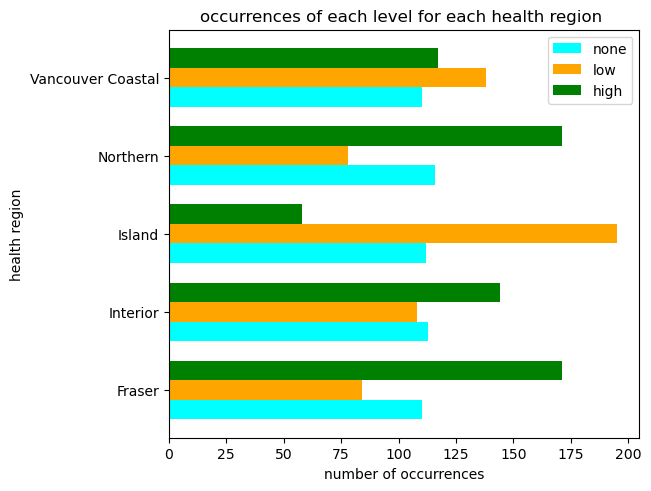

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(layout='constrained')
x = np.arange(case_bins_counts.shape[1])  # the label locations
width = 0.25  # the width of the bars

plt.barh(x-width, none, width, color='cyan')
plt.barh(x, low, width, color='orange')
plt.barh(x+width, high, width, color='green')


plt.yticks(x, list(case_bins_counts.columns))
plt.xlabel("number of occurrences")
plt.ylabel("health region")
plt.legend(["none", "low", "high"])
plt.title('occurrences of each level for each health region ')
plt.show()

## Question 4

For a single health region of your choice, determine the mean
cases per 100,000 during “High” and “Low” case times.
(recall your `case_bins` DataFrame from the exercise above)

In [14]:
Fraser_high_mean = cases_bc.loc[case_bins["Fraser"] == "High", "Fraser"].mean()
Fraser_low_mean = cases_bc.loc[case_bins["Fraser"] == "Low", "Fraser"].mean()
round(Fraser_high_mean,4), round(Fraser_low_mean,4)

(25.8346, 4.8293)

The chosen health region is 'Fraser', the mean cases per 100,000 during "High" and "Low" case times are 25.8346 and 4.8293 respectively.

Which health regions in our sample performs the best during “bad times" ? To
determine this, compute each health region’s mean daily cases per 100,000 where the daily cases per 100,000 is greater than 10 (i.e., in the "high"
category as defined above).

In [15]:
high_mean_list =list()
for i in list(cases_bc.columns):
    high_mean_list.append(cases_bc.loc[case_bins[i] == "High", i].mean())
high_means = np.array([list(cases_bc.columns), high_mean_list])
high_means.T

array([['Fraser', '25.834643784274338'],
       ['Interior', '25.33222969571726'],
       ['Island', '20.9212439275203'],
       ['Northern', '31.457949820626528'],
       ['Vancouver Coastal', '23.868397280368058']], dtype='<U32')

From the above table, we found that health region "Island" has the smallest mean daily cases during "High" case times (i.e. bad times) per 100,000 where the daily cases per 100,000 is greater than 10 that the smaller the value is, the better the performance of the health region during the "bad times".

# Questions 5-8

Run the following code to load a cleaned piece of census data from Statistics Canada.

In [16]:
df = pd.read_csv("https://datascience.quantecon.org/assets/data/canada_census.csv", header=0, index_col=False)
df.head()

,CDcode,Pname,Population,CollegeEducated,PercentOwnHouse,Income
0,1001,Newfoundland and Labrador,270350,24.8,74.1,74676
1,1002,Newfoundland and Labrador,20370,7.5,86.3,60912
2,1003,Newfoundland and Labrador,15560,7.3,86.0,56224
3,1004,Newfoundland and Labrador,20385,10.9,73.7,44282
4,1005,Newfoundland and Labrador,42015,17.0,73.9,62565


A *census division* is a geographical area, smaller than a Canadian province, that is used to
organize information at a slightly more granular level than by province or by city. The census
divisions are shown below.

![https://datascience.quantecon.org/_static/canada_censusdivisions_map.png](https://datascience.quantecon.org/_static/canada_censusdivisions_map.png)

  
The data above contains information on 1) the population, 2) percent of population with a college
degree, 3) percent of population who own their house/apartment, and 4) the median after-tax income at the
*census division* level.

## Question 5

Run the code below to create a separate data source with province codes and names.

In [17]:
df_provincecodes = pd.DataFrame({
    "Pname" : [ 'Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia',
                'New Brunswick', 'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan',
                'Alberta', 'British Columbia', 'Yukon', 'Northwest Territories','Nunavut'],
    "Code" : ['NL', 'PE', 'NS', 'NB', 'QC', 'ON', 'MB', 'SK', 'AB', 'BC', 'YT', 'NT', 'NU']
            })
df_provincecodes

,Pname,Code
0,Newfoundland and Labrador,NL
1,Prince Edward Island,PE
2,Nova Scotia,NS
3,New Brunswick,NB
4,Quebec,QC
5,Ontario,ON
6,Manitoba,MB
7,Saskatchewan,SK
8,Alberta,AB
9,British Columbia,BC


With this,

1. Either merge or join these province codes into the census dataframe to provide province codes for each province
  name. You need to figure out which “key” matches in the merge, and don’t be afraid to rename columns for convenience.  
1. Drop the province names from the resulting dataframe.  
1. Rename the column with the province codes to “Province”.  Hint: `.rename(columns = <YOURDICTIONARY>)`  

In [18]:
df_merged = pd.merge(df, df_provincecodes, on="Pname")
df_merged = df_merged.drop(['Pname'], axis=1)
df_merged = df_merged.rename(columns = {'Code' : 'Province'})
df_merged

,CDcode,Population,CollegeEducated,PercentOwnHouse,Income,Province
0,1001,270350,24.8,74.1,74676,NL
1,1002,20370,7.5,86.3,60912,NL
2,1003,15560,7.3,86.0,56224,NL
3,1004,20385,10.9,73.7,44282,NL
4,1005,42015,17.0,73.9,62565,NL
...,...,...,...,...,...,...
288,6105,6980,17.7,61.8,104302,NT
289,6106,20090,33.7,56.8,141700,NT
290,6204,18990,17.8,19.3,104896,NU
291,6205,10410,10.0,22.2,93294,NU


## Question 6

Which province has the highest population? Which has the lowest?

In [19]:
df_summary = df_merged.groupby('Province').agg(sum)
df_pop = df_summary['Population'].sort_values(ascending=False)
df_pop

Province
ON    13448490
QC     8164380
BC     4648080
AB     4067160
MB     1278375
SK     1098355
NS      923600
NB      747090
NL      519710
PE      142905
NT       41790
NU       35945
YT       35875
Name: Population, dtype: int64

The provinces `ON` and `YT` have the highest and lowest population respectively.

## Question 7

Which province has the highest *percent of individuals* with a college education? Which has the
lowest?

Hint: Remember to weight this calculation by population!

In [20]:
df_merged['CollegePop'] = df_merged['CollegeEducated'] * df_merged['Population'] * 0.01
df_college_pop = pd.merge(df_merged.groupby('Province').agg(sum)['CollegePop'], df_pop, on="Province")
df_college_pop['CollegePercent'] = df_college_pop['CollegePop']/ df_college_pop['Population']
df_college_pop['CollegePercent'].sort_values(ascending=False)

Province
ON    0.315724
YT    0.301000
BC    0.295900
AB    0.277658
QC    0.253619
NS    0.251561
MB    0.246780
NT    0.238144
PE    0.236066
SK    0.220955
NB    0.201684
NL    0.182109
NU    0.140844
Name: CollegePercent, dtype: float64

Provinces `ON` and `NU` have the highest and lowest percent of individuals with a college education respectively.

## Question 8

By province, what is the *total population* of all census divisions in which more than 80 percent of the population own houses?

In [21]:
df_80morePercentOwnHouse = df_merged.where(df_merged['PercentOwnHouse'] > 80)
df_80morePercentOwnHouse.groupby('Province').agg(sum)['Population'].sort_values(ascending=False)

Province
ON    2915560.0
QC     508075.0
MB     220595.0
NB     133995.0
AB     122155.0
NL     121425.0
NS      68585.0
SK      36595.0
BC      31445.0
PE      17160.0
Name: Population, dtype: float64

As the table shown above, the total population of all census divisions in which more than 80 percent of the population own house are listed on the second column with respect to the corresponding province shown on the first column. For example, the total population of all census divisions in which more than 80 percent of the population own houses in `ON` is 2915560.0